In [103]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [104]:
df = pd.read_csv('pharmodel_v5.csv')

In [105]:
df.head()

,Unnamed: 0,Unnamed: 0.1,asin,cat,rating,reviews,price,vp,fsa_flg,eff_max_str,...,safe_nausea,safe_vomiting,safe_allergic,safe_drowsiness,safe_stomach,safe_heart,safe_stroke,safe_heartburn,safe_lightheadedness,safe_sweating
0,0,0,B07BQKPMFM,cold,4.7,11523,12.74,0.368917,1,1,...,1,1,1,0,0,0,0,0,0,0
1,1,1,B009ITR4EY,cold,4.8,26392,7.66,0.626632,1,1,...,1,1,1,0,0,1,0,0,0,0
2,2,2,B013Q8JZVM,cold,4.8,1389,15.34,0.312907,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,B074F297S8,cold,4.7,10169,7.99,0.588235,1,0,...,1,1,1,1,0,0,0,0,0,0
4,4,4,B011VX2FGQ,cold,4.7,3448,12.98,0.362096,1,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.columns[:10]

Index(['Unnamed: 0', 'Unnamed: 0.1', 'asin', 'cat', 'rating', 'reviews',
       'price', 'vp', 'fsa_flg', 'eff_max_str'],
      dtype='object')

In [107]:
df['y_class'] = df['vp_cat3']

In [108]:
# Create sym_count by counting the occurrences of 1's across sym features
df['sym_count'] = df[['sym_throat', 'sym_stomach', 'sym_sneezing', 'sym_sinus', 
                      'sym_pain', 'sym_nose', 'sym_nausea', 'sym_nasal', 'sym_migranie', 
                      'sym_menstrual', 'sym_itchy', 'sym_heart', 'sym_headache', 'sym_flu',
                      'sym_fever', 'sym_eyes', 'sym_digestion', 'sym_cough', 'sym_cold', 'sym_chest',
                      'sym_arthritis', 'sym_allergy', 'sym_acid']].sum(axis=1)

In [109]:
df['safe_count'] = df[['safe_rash', 'safe_fever', 'safe_liver',
       'safe_throat', 'safe_skin', 'safe_nausea', 'safe_vomiting',
       'safe_allergic', 'safe_drowsiness', 'safe_stomach', 'safe_heart',
       'safe_stroke', 'safe_heartburn', 'safe_lightheadedness',
       'safe_sweating']].sum(axis=1)

In [110]:
X_features = ['sym_count','fsa_flg', 'eff_max_str', 'eff_fast_acting', 'eff_long_lasting',
       'eff_non_drowsy', 'eff_kid', 'ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali',
       'ingre_ipecacuanha', 'ingre_ibuprofen', 'ingre_hydrobromide',
       'ingre_guaifenesin', 'ingre_gelsemium', 'ingre_fexofenadine',
       'ingre_famotidine', 'ingre_eupatorium', 'ingre_eucalyptus',
       'ingre_esomeprazole', 'ingre_echinacea', 'ingre_doxylamine',
       'ingre_diphenhydramine', 'ingre_dextromethorphan',
       'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
       'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
       'ingre_acetaminophen', 'brand_zyrtec', 'brand_zicam',
       'brand_zegerid_otc', 'brand_vicks', 'brand_tylenol', 'brand_tums',
       'brand_time_cap_labs_inc', 'brand_theraflu', 'brand_rolaids',
       'brand_rite_aid', 'brand_quality_choice', 'brand_prilosec',
       'brand_prelief', 'brand_pepto_bismol', 'brand_pepcid', 'brand_nexium',
       'brand_natures_way', 'brand_mylanta', 'brand_mucinex', 'brand_motrin',
       'brand_midol', 'brand_major', 'brand_hylands', 'brand_goodsense',
       'brand_gaviscon', 'brand_flonase', 'brand_excedrin',
       'brand_coricidin_hbp', 'brand_claritin', 'brand_chloraseptic',
       'brand_boiron', 'brand_benadryl', 'brand_amazon_basic_care',
       'brand_allegra', 'brand_alka_seltzer_plus', 'brand_alka_seltzer',
       'brand_aleve', 'brand_airborne', 'brand_advil', 'brand_a2z_store',
       'manu_gsk', 'manu_jj', 'manu_bayer', 'manu_rb', 'manu_perrigo',
       'manu_pg', 'manu_sanofi', 'manu_ama', 'manu_major', 'manu_rite',
       'manu_boiron', 'manu_pfizer', 'manu_hyland', 'manu_alka',
       'manu_allegiant', 'manu_prestige', 'manu_dwight', 'manu_emc', 'manu_nw',
       'manu_walmart', 'manu_kirkland', 'manu_ohm', 'manu_reddy',
       'manu_bionpharma', 'manu_time', 'count_q_00', 'count_q_10',
       'count_q_20', 'count_q_30', 'inch_q_00', 'inch_q_10', 'inch_q_20',
       'inch_q_30', 'weight_q_00', 'weight_q_10', 'weight_q_20', 'weight_q_30',
             'safe_count']

# change category

In [111]:
data = df[df.cat=='alg'][X_features+['y_class','vp', 'cat', 'asin', 'rating', 'reviews', 'price']]

In [112]:
data.y_class.value_counts()

0    176
1    176
Name: y_class, dtype: int64

In [113]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset and split into training, validation, and testing sets

X_train, y_train, z = data[X_features], data['y_class'], data['vp']
# X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42, stratify=y)


# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(early_stopping=True, max_iter=1000,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Hyperparameters for grid search
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200,300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__bootstrap':[True,False]
    }
     ,
    'XGBoost': {
        'classifier__learning_rate': [0.01, 0.05, 0.1],
        'classifier__n_estimators': [100, 200,300],
        'classifier__max_depth': [3, 5, 7],
    },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
    }
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

for name, model in models.items():
    print(f"===== {name} =====")
    
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # If the model has hyperparameters to tune, apply GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
#         if name == 'Random Forest':
#             rf_model = best_pipeline
        # Output the best hyperparameters for each model
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)
    
    if name == 'Random Forest':
        rf_model = best_pipeline
    if name == 'XGBoost':
        gb_model = best_pipeline
    if name == 'LDA':
        lda_model = best_pipeline
    if name == 'Logistic Regression':
        lr_model = best_pipeline
    
    # Cross-Validation metrics
    cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5, scoring=scoring)
    
    for metric in scoring.keys():
        mean_metric = np.mean(cv_results[f'test_{metric}'])
        std_metric = np.std(cv_results[f'test_{metric}'])
        print(cv_results[f'test_{metric}'],f"{metric.capitalize()}: {mean_metric:.4f} ± {std_metric:.4f}")

        
    print()

===== Logistic Regression =====
[0.63380282 0.61971831 0.77142857 0.67142857 0.7       ] Accuracy: 0.6793 ± 0.0540
[0.58823529 0.64516129 0.82758621 0.65       0.71875   ] Precision: 0.6859 ± 0.0820
[0.85714286 0.55555556 0.68571429 0.74285714 0.65714286] Recall: 0.6997 ± 0.0994
[0.69767442 0.59701493 0.75       0.69333333 0.68656716] F1: 0.6849 ± 0.0494
[0.7531746  0.68650794 0.82857143 0.75510204 0.75061224] Roc_auc: 0.7548 ± 0.0450

===== Decision Tree =====
[0.63380282 0.57746479 0.61428571 0.54285714 0.7       ] Accuracy: 0.6137 ± 0.0533
[0.61538462 0.59375    0.63333333 0.5483871  0.71875   ] Precision: 0.6219 ± 0.0561
[0.68571429 0.52777778 0.54285714 0.48571429 0.65714286] Recall: 0.5798 ± 0.0776
[0.64864865 0.55882353 0.58461538 0.51515152 0.68656716] F1: 0.5988 ± 0.0616
[0.63452381 0.5781746  0.63387755 0.52367347 0.69510204] Roc_auc: 0.6131 ± 0.0580

===== MLP =====
Best hyperparameters for MLP: {'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (100,), 'cl

# Variable importance

In [114]:
## 1shap

In [115]:
#pip install shap

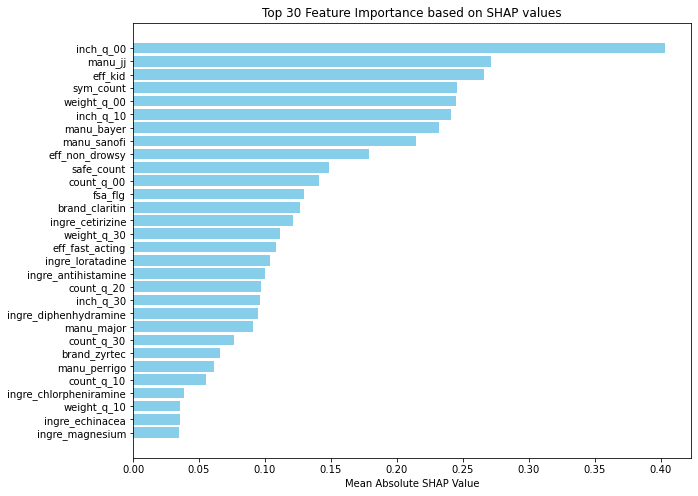

In [116]:
import shap
import numpy as np
import matplotlib.pyplot as plt
# Create a SHAP explainer object
explainer = shap.Explainer(lr_model.named_steps['classifier'], X_train)
shap_values = explainer.shap_values(X_train)

# Calculate absolute mean SHAP values
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Get indices of top 30 features sorted by absolute SHAP values
top_indices = np.argsort(mean_abs_shap_values)[::-1][:30]

# Select top 30 feature names and corresponding mean absolute SHAP values
top_feature_names = [feature_names[i] for i in top_indices]
top_mean_abs_shap_values = mean_abs_shap_values[top_indices]

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_feature_names)), top_mean_abs_shap_values, align='center', color='skyblue')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 30 Feature Importance based on SHAP values')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [124]:
data[data.eff_non_drowsy==0].rating.mean(), data[data.eff_non_drowsy==0].price.mean()

(4.611555555555558, 19.636977777777755)

In [125]:
data[data.eff_non_drowsy==1].rating.mean(), data[data.eff_non_drowsy=1].price.mean()

(4.666929133858266, 21.12543307086613)

In [129]:
from scipy.stats import ttest_ind
ttest_ind(data[data.eff_non_drowsy == 1]['rating'], data[data.eff_non_drowsy == 0]['rating'])

Ttest_indResult(statistic=2.1705886089156006, pvalue=0.030634081748150598)

In [131]:
(4.66-4.61)/4.61, (21.13-19.63)/19.63

(0.010845986984815578, 0.07641365257259297)

In [126]:
data[data.eff_kid==0].rating.mean(), data[data.eff_kid==0].price.mean()

(4.6249134948096895, 21.167370242214492)

In [128]:
data[data.eff_kid==1].rating.mean(), data[data.eff_kid==1].price.mean()

(4.661904761904762, 15.61714285714286)

In [145]:
data.safe_count.mean()

0.5994318181818182

In [132]:
## binary safe count
data['safe_warn'] = 0
data.loc[data.safe_count>=1, 'safe_warn'] = 1

In [143]:
data.groupby('safe_count')['vp'].mean()

safe_count
0    0.328589
1    0.325685
2    0.533393
3    0.313845
4    0.409241
7    0.259067
Name: vp, dtype: float64

In [141]:
data.safe_count.mean()

0.5994318181818182

In [133]:
from scipy.stats import chi2_contingency

# Selecting relevant columns for each group
#group1 = data[data['safe_count'] >= 1]
#group2 = data[data['safe_count'] == 0]

# Ingredients to compare
ingredients_to_compare = ['ingre_zinc', 'ingre_simethicone', 'ingre_pulsatilla',
       'ingre_phosphorus', 'ingre_phenylephrine', 'ingre_perfoliatum',
       'ingre_peppermint', 'ingre_omeprazole', 'ingre_naproxen',
       'ingre_menthol', 'ingre_magnesium', 'ingre_loratadine', 'ingre_kali',
       'ingre_ipecacuanha', 'ingre_ibuprofen', 'ingre_hydrobromide',
       'ingre_guaifenesin', 'ingre_gelsemium', 'ingre_fexofenadine',
       'ingre_famotidine', 'ingre_eupatorium', 'ingre_eucalyptus',
       'ingre_esomeprazole', 'ingre_echinacea', 'ingre_doxylamine',
       'ingre_diphenhydramine', 'ingre_dextromethorphan',
       'ingre_chlorpheniramine', 'ingre_cetirizine', 'ingre_calcium',
       'ingre_bryonia', 'ingre_antihistamine', 'ingre_aluminum',
       'ingre_acetaminophen']

# Initialize a DataFrame to store the chi-square test results
results = pd.DataFrame(columns=['Ingredient', 'Chi-Square Statistic', 'P-value', 'Count'])

# Perform chi-square test for each ingredient
for ingredient in ingredients_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(data['safe_warn'], data[ingredient])
    
    # Check if there is data in the contingency table
    if contingency_table.size > 0:
        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Append the results to the DataFrame
        results = results.append({'Ingredient': ingredient,
                                  'Chi-Square Statistic': chi2,
                                  'P-value': p,
                                 'Count': sum(data[ingredient])}, ignore_index=True)

# Display the results
print(results[results['P-value']<0.05])

               Ingredient  Chi-Square Statistic   P-value Count
25  ingre_diphenhydramine             12.743520  0.000357    25
28       ingre_cetirizine             23.299062  0.000001    41


In [122]:
np.quantile(mean_abs_shap_values,0.95)

0.2330254058640296

In [118]:
top_mean_abs_shap_values

array([0.40300237, 0.27144912, 0.2658653 , 0.24546101, 0.24482238,
       0.24135682, 0.23209969, 0.21451714, 0.17871889, 0.14868281,
       0.14099686, 0.12925393, 0.12665218, 0.1211743 , 0.11144242,
       0.10822227, 0.10414669, 0.10029985, 0.0973817 , 0.0963896 ,
       0.09439067, 0.0906338 , 0.07676865, 0.06583438, 0.06145539,
       0.05526848, 0.03834876, 0.03589792, 0.03534411, 0.03445202])

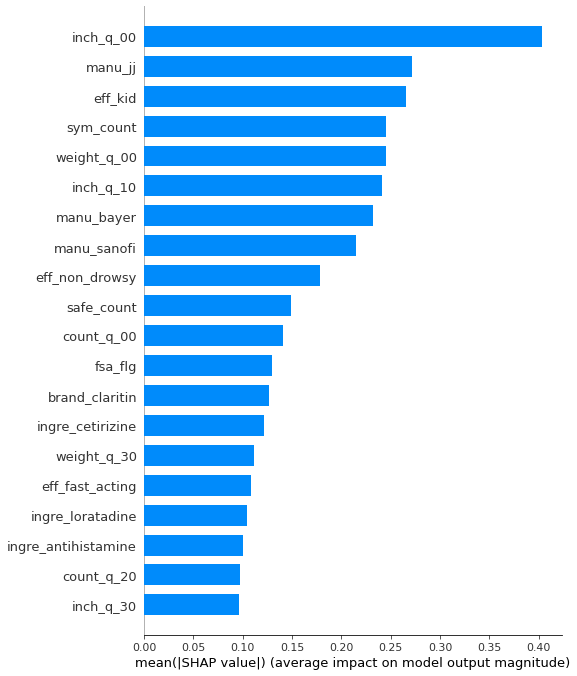

In [119]:
import shap
import matplotlib.pyplot as plt

# Create a summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)

# Show the plot
plt.show()

In [120]:
import pandas as pd

# Extract coefficient estimates
coefficients = lr_model.named_steps['classifier'].coef_[0]

# Calculate p-values (not directly available in scikit-learn)
# You would typically use statsmodels for p-values with logistic regression

# Create a DataFrame to store coefficients and p-values
variable_info = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Calculate absolute coefficients
variable_info['Absolute Coefficient'] = abs(variable_info['Coefficient'])

# Sort variables based on absolute coefficient values
variable_info.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# You should determine statistical significance based on your chosen method
# Since we don't have p-values directly, you might need to use other statistical tools
# For demonstration purposes, I'm assuming all coefficients are statistically significant
variable_info['Significance'] = True

# Print the ranked variables and their statistical significance
# print(variable_info[:20])

In [121]:
import pandas as pd

# Assuming you have a DataFrame named 'top_feature_names' containing the names of the top features
# and another DataFrame named 'variable_info' containing information about all features

# Filter variable_info to include only rows where the Feature is in top_feature_names
filtered_variable_info = variable_info[variable_info['Feature'].isin(top_feature_names)]

# Order filtered_variable_info by the top_feature_names list
ordered_variable_info = filtered_variable_info.set_index('Feature').loc[top_feature_names].reset_index()
ordered_variable_info

,Feature,Coefficient,Absolute Coefficient,Significance
0,inch_q_00,1.376716,1.376716,True
1,manu_jj,-1.275362,1.275362,True
2,eff_kid,0.922743,0.922743,True
3,sym_count,0.111355,0.111355,True
4,weight_q_00,0.742909,0.742909,True
5,inch_q_10,1.049377,1.049377,True
6,manu_bayer,-1.317302,1.317302,True
7,manu_sanofi,-1.023726,1.023726,True
8,eff_non_drowsy,-0.380759,0.380759,True
9,safe_count,-0.164995,0.164995,True
